In [44]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [45]:
df=pd.read_csv("50_Startups (1).csv")

In [46]:
df1=df.copy()
df1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [47]:
df1.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

Check data types like int64,float64,object,etc..

In [48]:
df1.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [49]:
df1.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Correlation between feature and target

1.Feature and target should be highly correlated

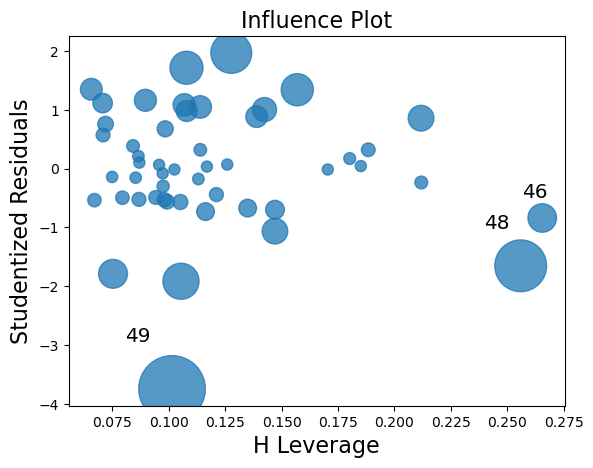

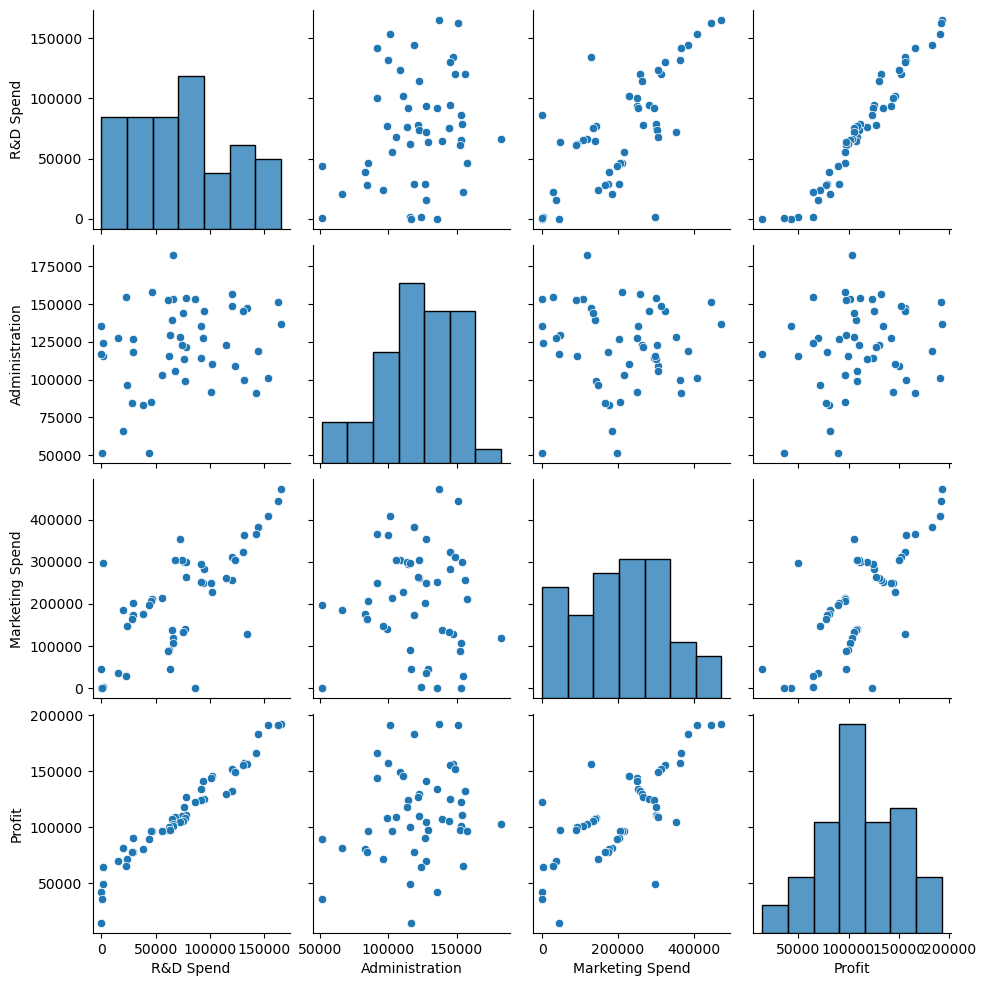

In [50]:
sns.pairplot(df1)
plt.show()

C:\Users\Dell\anaconda3.1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


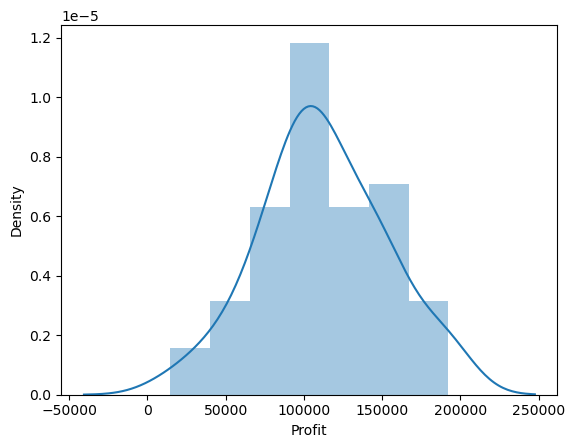

In [51]:
sns.distplot(df1["Profit"])
plt.show()

Distplot represent the distribution of data using histogram and Bell curve

A Target column is normally distributed.

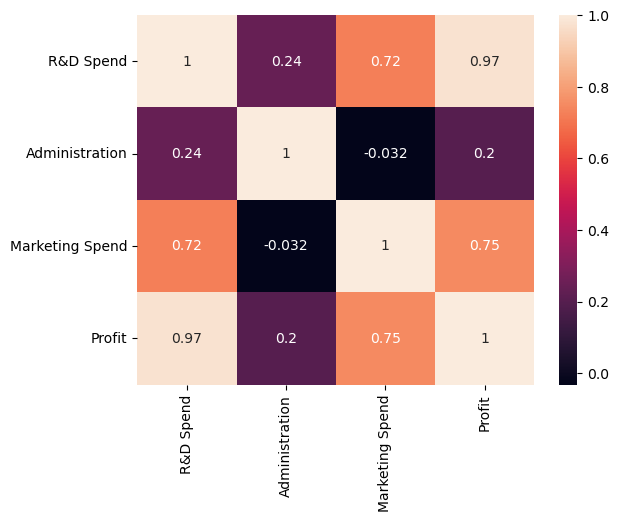

In [52]:
corr=df1.corr()
sns.heatmap(corr,annot=True,)
plt.show()

Heatmap represent a visualiztion of correlation matrics

In these visualisation R&D Spend is 72% correlated to Marketing spend

In [53]:
df1=pd.get_dummies(df1,columns=["State"])
df1

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


1.Using Encoding aplly Onehot encoding to state column.

2.Because,State column was categorical column(This column having a class)

# Model Preparing

In [54]:
x=df1[["R&D Spend","Administration","Marketing Spend","State_California","State_Florida","State_New York"]]
y=df1[["Profit"]]

Seprate data into Feature and target and store in variables(x,y)

In [55]:
model=smf.ols("y~x",data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           1.34e-27
Time:                        02:21:26   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
x[0]           0.8060      0.046     17.369      0.000       0.712       0.900
x[1]          -0.0270      0.052     -0.517      0.608      -0.132       0.078
x[2]           0.0270      0.017      1.574      0.123      -0.008       0.062
x[3]        1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
x[4]        1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
x[5]        1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     3.84e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.63e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

From library called statsmodel we use ols(ordinary least squared) method.

we got,

1.performance of model 

2.Feature Importance by pvalue

And Many for statistics

# VIF(Variance inflation factor)

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif[["VIF Factor"]]

,VIF Factor
0,2.495511
1,1.177766
2,2.416797
3,9.044052
4,9.443578
5,9.222969


From VIF we check Normality of data 

In Normality we define relationship between feature and feature is nonlinear

In [57]:
vif["features"] = x.columns
vif.round(1)

,VIF Factor,features
0,2.5,R&D Spend
1,1.2,Administration
2,2.4,Marketing Spend
3,9.0,State_California
4,9.4,State_Florida
5,9.2,State_New York


We droped "Administration" column beacuse of less VIF Factor

In [58]:
x1=df1[["R&D Spend","Marketing Spend","State_California","State_Florida","State_New York"]]

In [59]:
y=df1[["Profit"]]


In [60]:
df1_vif=df1.drop("Administration",axis=1)
df1_vif

,R&D Spend,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,471784.10,192261.83,0,0,1
1,162597.70,443898.53,191792.06,1,0,0
2,153441.51,407934.54,191050.39,0,1,0
3,144372.41,383199.62,182901.99,0,0,1
4,142107.34,366168.42,166187.94,0,1,0
5,131876.90,362861.36,156991.12,0,0,1
6,134615.46,127716.82,156122.51,1,0,0
7,130298.13,323876.68,155752.60,0,1,0
8,120542.52,311613.29,152211.77,0,0,1
9,123334.88,304981.62,149759.96,1,0,0


In [61]:
model1_vif=smf.ols("y~x1",data=df1).fit()
model1_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     215.8
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           9.72e-29
Time:                        02:21:26   Log-Likelihood:                -525.53
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1071.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.525e+04   2100.376     16.782      0.000     3.1e+04    3.95e+04
x1[0]          0.7967      0.042     18.771      0.000       0.711       0.882
x1[1]          0.0298      0.016      1.842      0.072      -0.003       0.062
x1[2]       1.171e+04   1910.312      6.130      0.000    7861.854    1.56e+04
x1[3]       1.185e+04   2170.903      5.459      0.000    7477.785    1.62e+04
x1[4]       1.169e+04   1988.428      5.879      0.000    7684.996    1.57e+04
==============================================================================
Omnibus:                       14.640   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.037
Skew:                          -0.938   Prob(JB):                     2.70e-05
Kurtosis:                       5.565   Cond. No.                     2.19e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.88e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

After,Doing VIF the model performce is approx. same as pervious model

Model performance is 95%(R2 score)

After Vif column 2 is not much import for model preparing beacuse p<0.05 then model is important

# Residual analysis

In [62]:
a=model1_vif.resid

Residual of model thats is difference between actual data and predicted values

In [63]:
model1_vif.fittedvalues

0     192716.045225
1     189713.718878
2     181489.428305
3     173367.500227
4     171216.444327
5     162806.718655
6     158012.480024
7     160549.338194
8     152251.473717
9     154298.493451
10    135115.907862
11    134598.641954
12    129317.860381
13    127770.141039
14    150295.043405
15    145973.269034
16    116979.772435
17    130763.575443
18    128974.236897
19    115793.685842
20    116599.095938
21    118313.021192
22    115078.284890
23    109972.832315
24    112505.857457
25    102584.549900
26    111105.527690
27    114898.052901
28    103240.776813
29    102397.538637
30     99204.589241
31     98273.930179
32     98850.554264
33     97699.644041
34     90219.932792
35     89715.027502
36     75921.015547
37     87933.097789
38     68568.946276
39     82886.489100
40     75009.521047
41     74216.313367
42     70197.804086
43     60350.661250
44     65471.871971
45     47792.990538
46     56987.146725
47     46958.944984
48     47371.295924
49     48302.870349


In [64]:
pred=model1_vif.predict()

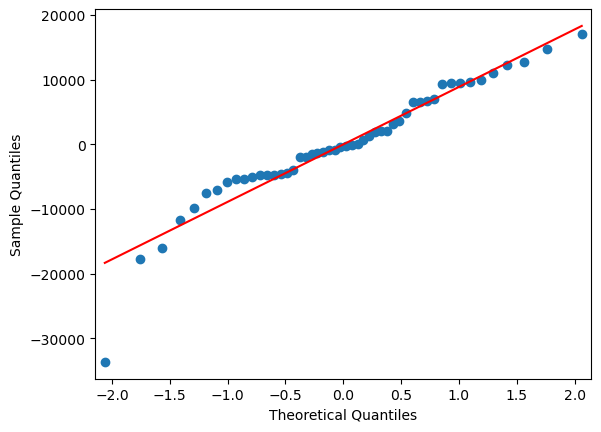

In [65]:
qqplot=sm.qqplot(model1_vif.resid,line="s")
plt.show()

Q-Q plot represent the normality of error matrics 

C:\Users\Dell\anaconda3.1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


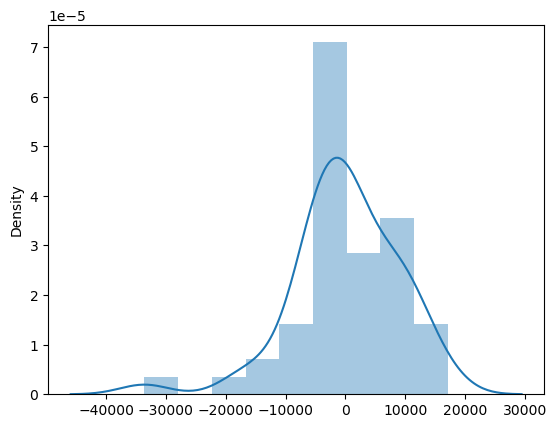

In [66]:
sns.distplot(model1_vif.resid)
plt.show()

Histogram of residual is approx normal distribution but its has small shifting to left side (left skewed)

# Residual plot

In [67]:
sc=StandardScaler()
sc_red=sc.fit_transform(model1_vif.resid.array.reshape(-1, 1))
sc_pred=sc.fit_transform(model1_vif.fittedvalues.array.reshape(-1, 1))

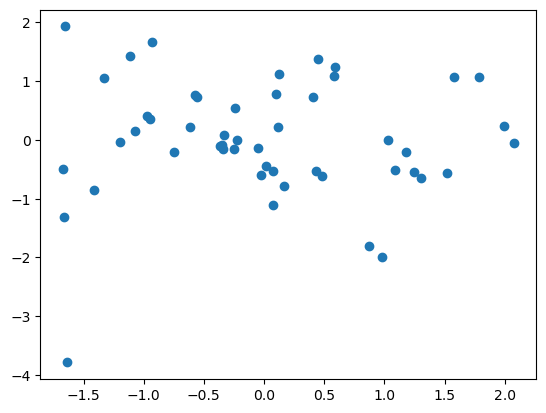

In [68]:
plt.scatter(sc_pred,sc_red)
plt.show()

It might be no pattern of relationship between target and residual

# COOKS DISTANCE

cooks distance is use for highlighting a outliers

In [69]:
model_influence=model.get_influence()

call a get influence

In [70]:
(c,_)=model_influence.cooks_distance

In [71]:
c

array([6.58235386e-06, 3.39430615e-03, 2.39098625e-02, 2.02032949e-02,
       1.20198420e-02, 1.00370545e-02, 2.13697865e-03, 3.57036535e-03,
       6.25257579e-05, 5.41213370e-03, 1.89764313e-02, 1.65867572e-02,
       1.82797330e-02, 6.34364572e-03, 6.17285106e-02, 3.72134923e-02,
       1.35078103e-02, 3.71193311e-03, 2.94854637e-03, 2.81922632e-02,
       6.02783698e-04, 1.00287995e-02, 3.02178458e-03, 3.16115938e-04,
       4.34597714e-03, 3.56884817e-03, 4.96640589e-03, 2.78597505e-02,
       9.20897921e-04, 9.83021753e-05, 2.28936702e-05, 3.65145588e-06,
       5.61582965e-04, 2.31043413e-04, 1.79909587e-02, 7.13289876e-03,
       5.07832731e-02, 6.16526092e-05, 4.78300794e-02, 1.37854568e-03,
       1.94676476e-03, 1.88154422e-03, 1.42427115e-04, 2.00561912e-02,
       1.00026060e-04, 8.09098154e-02, 3.62771434e-02, 3.84131479e-03,
       1.34036686e-01, 2.26250945e-01])

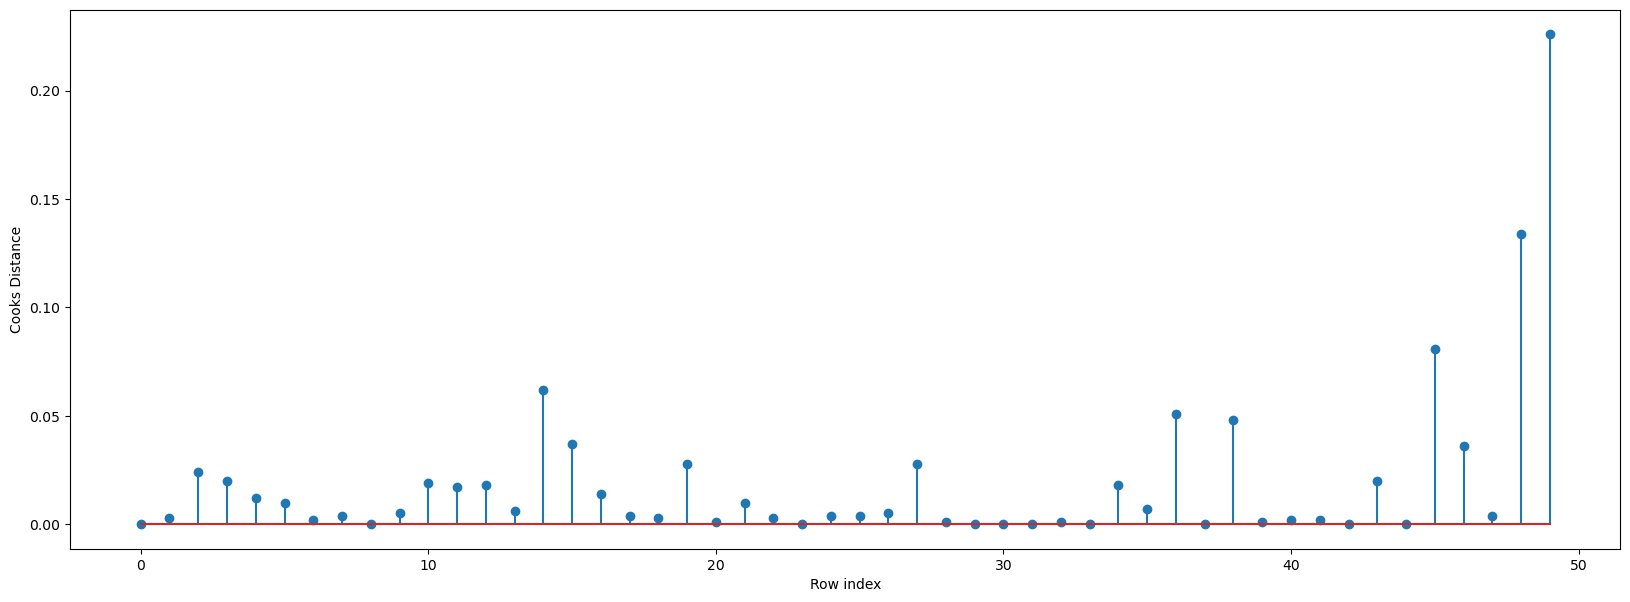

In [72]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()


stem plot is use for visualisation of influence of data points

There are three data points habving high influence on data 

In [73]:
np.argmax(c),np.max(c)

(49, 0.22625094501509285)

max influence in data points that is 49 row and the influence is 0.22

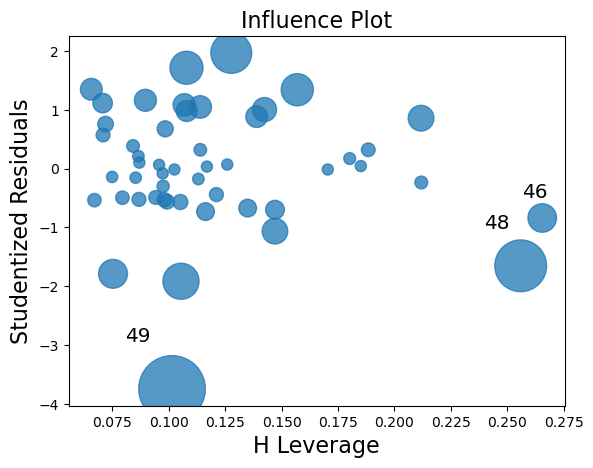

In [74]:
model_influence.plot_influence()


In this plot we get 3 data point which has high influence (46,48,49)

So we drop this rows for better model perfromance

# Final Model

In [79]:
new_df=df1_vif.drop(df1_vif.index[[46,48,49]])
new_df

,R&D Spend,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,471784.10,192261.83,0,0,1
1,162597.70,443898.53,191792.06,1,0,0
2,153441.51,407934.54,191050.39,0,1,0
3,144372.41,383199.62,182901.99,0,0,1
4,142107.34,366168.42,166187.94,0,1,0
5,131876.90,362861.36,156991.12,0,0,1
6,134615.46,127716.82,156122.51,1,0,0
7,130298.13,323876.68,155752.60,0,1,0
8,120542.52,311613.29,152211.77,0,0,1
9,123334.88,304981.62,149759.96,1,0,0


drop 46,48,49 Indexes

In [76]:
new_x=new_df[["R&D Spend","Marketing Spend","State_California","State_Florida","State_New York"]]
new_y=new_df[["Profit"]]

In [77]:
model_final=smf.ols("new_y~new_x",data=new_df).fit()

In [78]:
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  new_y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     253.5
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           8.29e-29
Time:                        02:21:27   Log-Likelihood:                -483.34
No. Observations:                  47   AIC:                             976.7
Df Residuals:                      42   BIC:                             985.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.869e+04   1837.843     21.054      0.000     3.5e+04    4.24e+04
new_x[0]       0.7447      0.038     19.443      0.000       0.667       0.822
new_x[1]       0.0325      0.014      2.328      0.025       0.004       0.061
new_x[2]    1.341e+04   1581.417      8.480      0.000    1.02e+04    1.66e+04
new_x[3]     1.27e+04   1778.684      7.142      0.000    9114.033    1.63e+04
new_x[4]    1.258e+04   1664.233      7.560      0.000    9222.491    1.59e+04
==============================================================================
Omnibus:                        0.106   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.948   Jarque-Bera (JB):                0.306
Skew:                           0.052   Prob(JB):                        0.858
Kurtosis:                       2.618   Cond. No.                     2.84e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.99e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Conclusion

1.For this better model preparation we used cooks distance,VIF method for getting low influence indexes and high VIF columns respectively

2.After doping Row and Column we got better model as compared to other models

3.R2 score of final model is 96%  

4. Hence model perform great (final model)